In [2]:
import pandas as pd
import zipfile

# Extract and load dataset
with zipfile.ZipFile("train.csv.zip") as z:
    with z.open("train.csv") as f:
        df = pd.read_csv(f)

print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

In [5]:
df["Month"] = df["Order Date"].dt.month

In [6]:
total_sales = df["Sales"].sum()
print("Total Sales:", total_sales)

Total Sales: 2261536.7827


In [7]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
print(region_sales)


Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


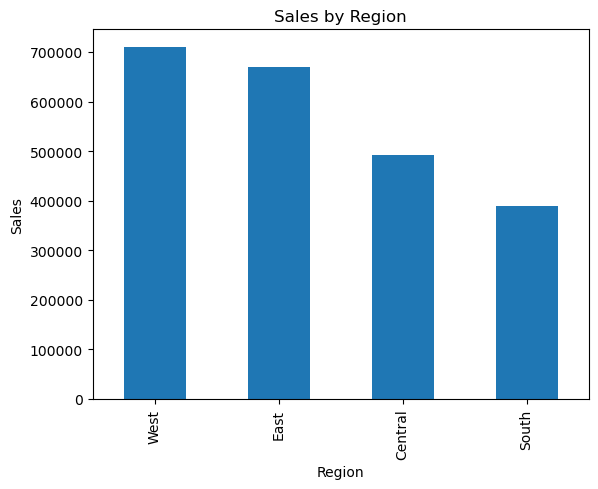

In [8]:
import matplotlib.pyplot as plt

region_sales.plot(kind='bar')
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

In [9]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
print(category_sales)

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64


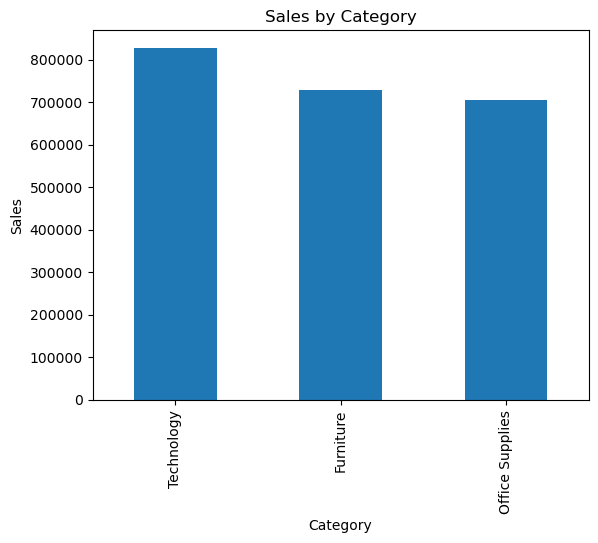

In [10]:
category_sales.plot(kind='bar')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

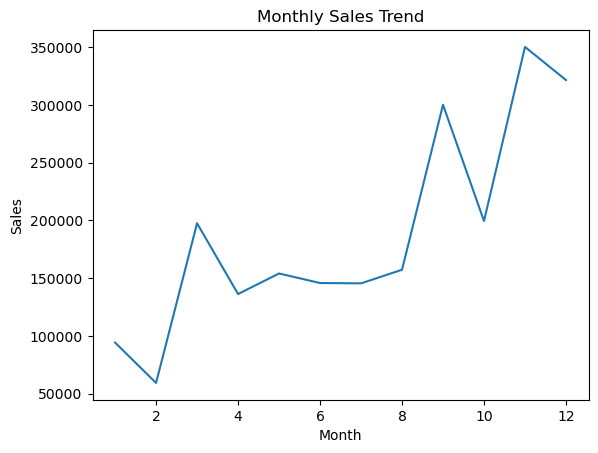

In [11]:
monthly_sales = df.groupby("Month")["Sales"].sum()

monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [12]:
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(5)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


In [14]:
### Insights
- The West region contributes the highest sales.
- Technology is the top-performing category.
- Sales peak towards the end of the year.
